# Import Modules

In [4]:
import os
import matplotlib.pyplot as plt
from collections import Counter

import torch
from torchvision import datasets,transforms,models
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim

from PIL import Image
import xmltodict


In [5]:
print("PyTorch Version: ",torch.__version__)


PyTorch Version:  1.10.2


In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device 

device(type='cuda')

# Load the dataset


In [7]:
img_names=[] 
xml_names=[] 
for dirname, _, filenames in os.walk('./dataset/'):
    for filename in filenames:
        if os.path.join(dirname, filename)[-3:]!="xml":
            img_names.append(filename)
        else:
            xml_names.append(filename)

In [8]:
path_annotations="./dataset/annotations/" 
listing=[]
for i in img_names[:]:
    with open(path_annotations+i[:-4]+".xml") as fd:
        doc=xmltodict.parse(fd.read())
    temp=doc["annotation"]["object"]
    if type(temp)==list:
        for i in range(len(temp)):
            listing.append(temp[i]["name"])
    else:
        listing.append(temp["name"])
        

Items = Counter(listing).keys()
values = Counter(listing).values()
print(Items,'\n',values)

dict_keys(['without_mask', 'mask_weared_incorrect', 'with_mask']) 
 dict_values([2563, 2458, 3232])


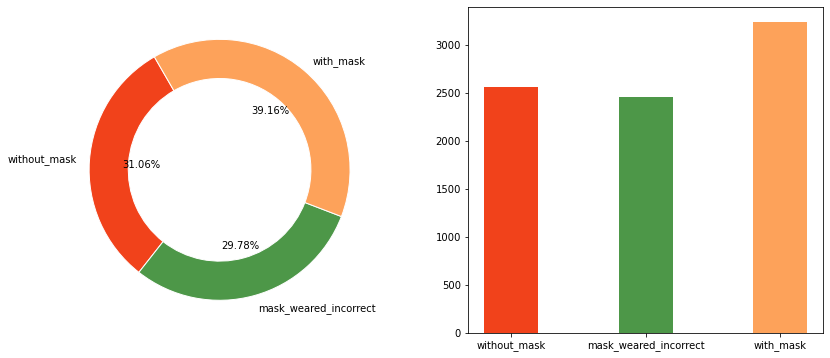

In [9]:
colors = ['#f1421b','#4d9748','#fda25a']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))
background_color = 'w'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color) 
ax1.pie(values,wedgeprops=dict(width=0.3, edgecolor='w') ,
        labels=Items, radius=1, startangle = 120, autopct='%1.2f%%', colors=colors)

ax2 = plt.bar(Items, list(values),
              color=colors ,width = 0.4)

plt.show()

Dataset contains images :

with_mask : 79.37% mask_weared_incorrect : 3.02% without_mask : 17.61%

In [10]:
options={"with_mask":0,"without_mask":1,"mask_weared_incorrect":2} 

In [11]:
path_image="./dataset/images/"  


In [14]:
def dataset_creation(image_list): 
    image_tensor=[]
    label_tensor=[]
    for i,j in enumerate(image_list):
        with open(path_annotations+j[:-4]+".xml") as fd:
            doc=xmltodict.parse(fd.read())
        if type(doc["annotation"]["object"])!=list:
            temp=doc["annotation"]["object"]
            x,y,w,h=list(map(int,temp["bndbox"].values()))
            label=options[temp["name"]]
            image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"), y,x,h-y,w-x)
            image_tensor.append(my_transform(image))
            label_tensor.append(torch.tensor(label))
        else:
            temp=doc["annotation"]["object"]
            for k in range(len(temp)):
                x,y,w,h=list(map(int,temp[k]["bndbox"].values()))
                label=options[temp[k]["name"]]
                image=transforms.functional.crop(Image.open(path_image+j).convert("RGB"),y,x,h-y,w-x)
                image_tensor.append(my_transform(image))
                label_tensor.append(torch.tensor(label))
                
    final_dataset=[[k,l] for k,l in zip(image_tensor,label_tensor)]
    return tuple(final_dataset)


my_transform=transforms.Compose([transforms.Resize((226,226)),
                                 transforms.ToTensor()])

mydataset=dataset_creation(img_names)

In [13]:
mydataset[0]


[tensor([[[0.7451, 0.7529, 0.7529,  ..., 0.6078, 0.6118, 0.6157],
          [0.7373, 0.7490, 0.7529,  ..., 0.6039, 0.6078, 0.6118],
          [0.7412, 0.7451, 0.7490,  ..., 0.6157, 0.6157, 0.6118],
          ...,
          [0.8353, 0.8549, 0.8627,  ..., 0.6039, 0.6000, 0.5922],
          [0.8353, 0.8510, 0.8549,  ..., 0.6000, 0.6000, 0.5961],
          [0.8431, 0.8471, 0.8549,  ..., 0.5961, 0.5922, 0.5882]],
 
         [[0.7137, 0.7216, 0.7137,  ..., 0.3059, 0.3098, 0.3137],
          [0.7059, 0.7098, 0.7098,  ..., 0.3020, 0.3059, 0.3098],
          [0.7020, 0.7020, 0.7059,  ..., 0.3137, 0.3137, 0.3098],
          ...,
          [0.7804, 0.7961, 0.8039,  ..., 0.2980, 0.2941, 0.2863],
          [0.7725, 0.7882, 0.7922,  ..., 0.2902, 0.2902, 0.2863],
          [0.7804, 0.7843, 0.7922,  ..., 0.2863, 0.2824, 0.2784]],
 
         [[0.5647, 0.5804, 0.5882,  ..., 0.0000, 0.0039, 0.0078],
          [0.5647, 0.5804, 0.5882,  ..., 0.0000, 0.0000, 0.0039],
          [0.5608, 0.5804, 0.5843,  ...,

In [17]:
train_size= int(len(mydataset)*0.7)
valid_size= int(len(mydataset)*0.2)
test_size= len(mydataset)-(train_size + valid_size)

print('Length of dataset is', len(mydataset), '\nLength of training set is :',train_size,'\nLength of test set is :', test_size,'\nLength of validation set is :',valid_size )

Length of dataset is 8253 
Length of training set is : 5777 
Length of test set is : 826 
Length of validation set is : 1650


In [19]:
trainset,testset,validset=torch.utils.data.random_split(mydataset,[train_size,test_size,valid_size])


In [22]:
import splitfolders


In [23]:
splitfolders.ratio("dataset", output="output",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=False) # default values

Copying files: 6686 files [00:12, 545.10 files/s]
